In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy
import patsy
import os.path as op
import glob
import moss
%matplotlib inline

In [6]:
#read data
new_df = pd.read_csv('./new_df.csv')
betas_df = pd.read_csv('./betas_df.csv')
pet_df = pd.read_csv(op.abspath('./pet_pca.csv'))
connectivity_df = pd.read_csv('./brain_connectivity_group.csv') ##IFS frontal o
subs = list(set(new_df['sub']))
len(subs)

77

In [7]:
#plotting settings
fontsize = 18
ticksize = fontsize*.8
figy = 4
sns.set_context('talk')
sns.__version__

'0.13.2'

In [8]:
drug_map = {'plac':'Placebo',
#            'brom':'Bromocriptine\n(D2 agonist)',
            'brom':'$\\bf{Bromocriptine}$\n$\it{(D2\ agonist)}$',
           'tolc':'Tolcapone'}
print(drug_map)
connectivity_df['Drug'] = [drug_map[x] for x in connectivity_df['drug']]

connectivity_df['sub'] = [int(x[2:]) for x in connectivity_df['sub']]


{'plac': 'Placebo', 'brom': '$\\bf{Bromocriptine}$\n$\\it{(D2\\ agonist)}$', 'tolc': 'Tolcapone'}


In [9]:
vst_map = {'high':'High D2/3 Density',
          'low':'Low D2/3 Density'}
connectivity_df['VST_rac_split'] = [vst_map[x] for x in connectivity_df['VST_rac_split']]


/var/folders/bn/dzh1ysw54m9cq4n3dnb30ldw0000gn/T/ipykernel_45996/620552385.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fig_df[' ']= fig_df['VST_rac_split']


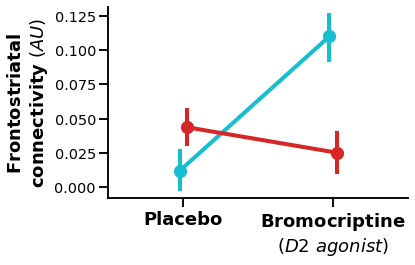

In [11]:
fig_df = connectivity_df[connectivity_df['drug']!='tolc']
fig_df[' ']= fig_df['VST_rac_split']

g = sns.catplot(x = 'Drug',
          y = 'nacc_connectivity_within',
            hue = ' ',
            kind = 'point',
            palette = [sns.color_palette()[9],sns.color_palette()[3]],
            hue_order = ['Low D2/3 Density','High D2/3 Density'],
            errorbar=('ci', 68),
#             linestyle='none',
                legend = False,
            dodge = .05,
          data = fig_df)    

g.figure.set_size_inches(1.5*figy,figy)

plt.xlabel("", 
           fontsize = 0)
plt.ylabel("$\\bf{Frontostriatal}$\n$\\bf{connectivity}$ $\it{(AU)}$", 
           fontsize = fontsize)
g.ax.tick_params(axis = 'y',
             labelsize=ticksize)
g.ax.tick_params(axis = 'x',
             labelsize=fontsize)

labels = g.ax.get_xticklabels()
for l in labels:
    l.set_fontweight('bold')
    l.set_fontsize(fontsize)
    
g.despine()
plt.savefig('../figs/paper/fMRI_effects.png',
           dpi = 600,
           bbox_inches = 'tight')

In [12]:
mod_df = connectivity_df.copy()
mod_df['VST_rac']= scipy.stats.zscore(mod_df['VST_rac'])
md = smf.mixedlm("nacc_connectivity ~ C(drug,  Treatment(reference='plac'))*VST_rac ",
            groups = mod_df['sub'],
           data = mod_df).fit()
md.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Mixed Linear Model Regression Results
===============================================================================================
Model:                        MixedLM           Dependent Variable:           nacc_connectivity
No. Observations:             396               Method:                       REML             
No. Groups:                   44                Scale:                        0.0141           
Min. group size:              9                 Log-Likelihood:               210.5790         
Max. group size:              9                 Converged:                    Yes              
Mean group size:              9.0                                                              
-----------------------------------------------------------------------------------------------
                                                     Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------------------------------------
Intercept                                             0.028    0.023  1.232 0.218 -0.016  0.072
C(drug, Treatment(reference='plac'))[T.brom]          0.040    0.015  2.718 0.007  0.011  0.068
C(drug, Treatment(reference='plac'))[T.tolc]          0.043    0.015  2.932 0.003  0.014  0.071
VST_rac                                               0.045    0.023  2.002 0.045  0.001  0.090
C(drug, Treatment(reference='plac'))[T.brom]:VST_rac -0.078    0.015 -5.322 0.000 -0.106 -0.049
C(drug, Treatment(reference='plac'))[T.tolc]:VST_rac -0.001    0.015 -0.053 0.958 -0.029  0.028
Group Var                                             0.018    0.038                           
===============================================================================================

"""

In [13]:
mod_df = connectivity_df.copy()
mod_df['VST_rac']= scipy.stats.zscore(mod_df['VST_fmt'])
md = smf.mixedlm("nacc_connectivity ~ C(drug,  Treatment(reference='plac'))*VST_fmt ",
            groups = mod_df['sub'],
           data = mod_df).fit()
md.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Mixed Linear Model Regression Results
==================================================================================================
Model:                         MixedLM            Dependent Variable:            nacc_connectivity
No. Observations:              396                Method:                        REML             
No. Groups:                    44                 Scale:                         0.0149           
Min. group size:               9                  Log-Likelihood:                219.0615         
Max. group size:               9                  Converged:                     Yes              
Mean group size:               9.0                                                                
--------------------------------------------------------------------------------------------------
                                                      Coef.  Std.Err.   z    P>|z|  [0.025  0.975]
--------------------------------------------------------------------------------------------------
Intercept                                             -0.161    0.176 -0.917 0.359  -0.505   0.183
C(drug, Treatment(reference='plac'))[T.brom]           0.439    0.115  3.809 0.000   0.213   0.665
C(drug, Treatment(reference='plac'))[T.tolc]           0.025    0.115  0.218 0.828  -0.201   0.251
VST_fmt                                               10.900   10.049  1.085 0.278  -8.796  30.595
C(drug, Treatment(reference='plac'))[T.brom]:VST_fmt -23.068    6.601 -3.495 0.000 -36.005 -10.131
C(drug, Treatment(reference='plac'))[T.tolc]:VST_fmt   1.021    6.601  0.155 0.877 -11.916  13.958
Group Var                                              0.018    0.037                             
==================================================================================================

"""